# Relax Inc Data Science Challenge

In [48]:
# Import necessary packages
import json
from pandas.io.json import json_normalize
import pandas as pd
from IPython.display import display
import matplotlib.pyplot as plt
from datetime import datetime, timedelta
import datetime
from tqdm import tqdm
import seaborn as sns
import math

import sklearn
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve, auc
import numpy as np

In [49]:
user_info_df = pd.read_csv(r'C:\Users\vpmodak\Desktop\Personal\Springboard\Intermediate Projects\relax_challenge\takehome_users.csv',encoding='latin-1')
engagement_info_df = pd.read_csv(r'C:\Users\vpmodak\Desktop\Personal\Springboard\Intermediate Projects\relax_challenge\takehome_user_engagement.csv',encoding='latin-1')

In [50]:
user_info_df.head(5)

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1.398139e+09,1,0,11,10803.0
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,1.363735e+09,0,0,94,1525.0
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,1.369210e+09,0,0,1,5151.0
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,1.358850e+09,0,0,193,5240.0


In [51]:
tqdm.pandas()
def adoption(user_val):
    flag = 0
    try:
        temp_df = engagement_info_df[engagement_info_df['user_id'] == user_val]
        for counter in temp_df['time_stamp']:
            date_after_seven_days = counter + datetime.timedelta(days=7)
            temp_df_2 = temp_df[(counter<=temp_df['time_stamp']) & (temp_df['time_stamp']<=date_after_seven_days)]
            if len(temp_df_2)>=3:
                flag = 1
                break
        return flag
    except:
        return flag
    

engagement_info_df['time_stamp'] = pd.to_datetime(engagement_info_df['time_stamp'])
# get missing indices which are users
missing_indices = list(set(list(range(1,12001))) - \
                  set(list(engagement_info_df['user_id'].value_counts().sort_index().index)))
dict_missing_indices = dict((el,0) for el in missing_indices)

# create datafrmae of value counts
engagement_info_df_inter = pd.DataFrame(engagement_info_df['user_id'].value_counts().reset_index())
engagement_info_df_inter.columns = ['user_id', 'visit_count']

# create dataframe of missing indices or users and visited count as zero
df_missing_indices = pd.DataFrame(dict_missing_indices.items(), columns = list(engagement_info_df_inter.columns))

#append both dataframes together
engagement_info_all = engagement_info_df_inter.append(df_missing_indices).sort_values(by='user_id').reset_index(drop=True)

engagement_info_all['is_adopted'] = engagement_info_all.progress_apply(lambda x: adoption(x['user_id']), axis=1)

C:\Users\vpmodak\Desktop\Work\Anaconda_Python\lib\site-packages\tqdm\std.py:648: FutureWarning: The Panel class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  from pandas import Panel
100%|███████████████████████████████████| 12000/12000 [00:46<00:00, 258.78it/s]


In [52]:
user_info_df['is_adopted'] = engagement_info_all['is_adopted']
user_info_df['visit_count'] = engagement_info_all['visit_count']
user_info_df = pd.concat([user_info_df,pd.get_dummies(user_info_df['creation_source'], prefix='source',drop_first=True)],axis=1)
user_info_df['user_invite'] = user_info_df['invited_by_user_id'].apply(lambda x: int(~np.isnan(x)))
display(user_info_df.head(5))
user_info_df.columns

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,is_adopted,visit_count,source_ORG_INVITE,source_PERSONAL_PROJECTS,source_SIGNUP,source_SIGNUP_GOOGLE_AUTH,user_invite
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1.398139e+09,1,0,11,10803.0,0,1,0,0,0,0,1
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0,1,14,1,0,0,0,1
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,1.363735e+09,0,0,94,1525.0,0,1,1,0,0,0,1
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,1.369210e+09,0,0,1,5151.0,0,1,0,0,0,0,1
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,1.358850e+09,0,0,193,5240.0,0,1,0,0,0,0,1


Index(['object_id', 'creation_time', 'name', 'email', 'creation_source',
       'last_session_creation_time', 'opted_in_to_mailing_list',
       'enabled_for_marketing_drip', 'org_id', 'invited_by_user_id',
       'is_adopted', 'visit_count', 'source_ORG_INVITE',
       'source_PERSONAL_PROJECTS', 'source_SIGNUP',
       'source_SIGNUP_GOOGLE_AUTH', 'user_invite'],
      dtype='object')

Following is the information on our dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12000 entries, 0 to 11999
Data columns (total 9 columns):
opted_in_to_mailing_list      12000 non-null int64
enabled_for_marketing_drip    12000 non-null int64
org_id                        12000 non-null int64
visit_count                   12000 non-null int64
source_ORG_INVITE             12000 non-null uint8
source_PERSONAL_PROJECTS      12000 non-null uint8
source_SIGNUP                 12000 non-null uint8
source_SIGNUP_GOOGLE_AUTH     12000 non-null uint8
user_invite                   12000 non-null int64
dtypes: int64(5), uint8(4)
memory usage: 515.8 KB
None
Fitting 5 folds for each of 4 candidates, totalling 20 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:   50.6s finished


model building took 55 seconds

Training data set score is 0.9857291666666667

Best hyperparameters are

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=25, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=6, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=1000,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

Test data set score is 0.9866666666666667

Classification Report

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      2063
           1       0.97      0.94      0.95       337

    accuracy                           0.99      2400
   macro avg       0.98      0.97      0.97      2400
weighted avg

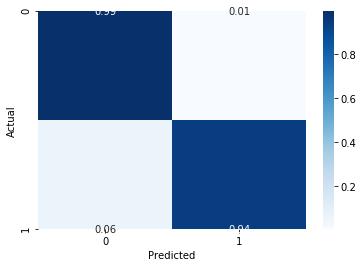

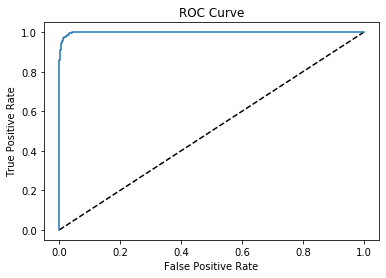

In [57]:
start = datetime.datetime.now()
# Test-Train split
X_Full = user_info_df[['opted_in_to_mailing_list','enabled_for_marketing_drip', 
                           'org_id', 'visit_count', 'source_ORG_INVITE',
                           'source_PERSONAL_PROJECTS', 'source_SIGNUP',
                           'source_SIGNUP_GOOGLE_AUTH', 'user_invite']]
y_Full = user_info_df[['is_adopted']]

print("Following is the information on our dataset\n")
print(X_Full.info())

X_train, X_test,y_train, y_test = train_test_split(X_Full, y_Full, test_size=0.2, random_state=42)

# Build Random Forest Classifier
rf = RandomForestClassifier(random_state = 42)
param_grid = {
            'bootstrap': [True],
            'max_depth': [25,30],
            'min_samples_leaf': [6,7],
            'min_samples_split': [2],
            'n_estimators': [1000]
            }
gs = sklearn.model_selection.GridSearchCV(estimator = rf, param_grid = param_grid, n_jobs = -1, verbose = 2, cv=5)
gs_results = gs.fit(X_train,y_train.values.ravel())
best_grid = gs_results.best_estimator_

end = datetime.datetime.now()
print('model building took {} seconds'.format((end-start).seconds))

## Training Score
print('\nTraining data set score is {}\n'.format(accuracy_score(best_grid.predict(X_train),y_train)))

## Hyperparameter and test score
print("Best hyperparameters are\n")
print(best_grid)
print('\nTest data set score is {}\n'.format(accuracy_score(best_grid.predict(X_test),y_test)))

## Classification report
print('Classification Report\n')
print(classification_report(y_test,best_grid.predict(X_test)))

## Confustion matrix
print('Confusion Matrix\n')
#labels = ['run', 'pass']
confmat = confusion_matrix(y_test, best_grid.predict(X_test))
confmat_n = confmat.astype('float')/confmat.sum(axis=1)[:, np.newaxis]
fig, ax = plt.subplots()
sns.heatmap(confmat_n, annot=True, fmt='.2f', cmap='Blues', ax=ax)
ax.set_ylabel('Actual')
ax.set_xlabel('Predicted')
ax.axhspan  
plt.savefig('Conf_mat_RF.png')

## ROC Curve
y_pred_prob = best_grid.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
fig, ax = plt.subplots()
ax.plot([0, 1], [0, 1], 'k--')
ax.plot(fpr, tpr)
ax.set_xlabel('False Positive Rate')
ax.set_ylabel('True Positive Rate')
ax.set_title('ROC Curve');
plt.savefig('ROC_RF.png')

## Feature Importance
print("Features sorted by their score:")
print(sorted(zip(map(lambda x: round(x, 4), best_grid.feature_importances_), X_train.columns), 
             reverse=True))

Following is the information on our dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12000 entries, 0 to 11999
Data columns (total 8 columns):
opted_in_to_mailing_list      12000 non-null int64
enabled_for_marketing_drip    12000 non-null int64
org_id                        12000 non-null int64
source_ORG_INVITE             12000 non-null uint8
source_PERSONAL_PROJECTS      12000 non-null uint8
source_SIGNUP                 12000 non-null uint8
source_SIGNUP_GOOGLE_AUTH     12000 non-null uint8
user_invite                   12000 non-null int64
dtypes: int64(4), uint8(4)
memory usage: 422.0 KB
None
Fitting 5 folds for each of 4 candidates, totalling 20 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:   56.7s finished


model building took 64 seconds

Training data set score is 0.86375

Best hyperparameters are

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=25, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=7, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=1000,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

Test data set score is 0.85875

Classification Report

              precision    recall  f1-score   support

           0       0.86      1.00      0.92      2063
           1       0.33      0.01      0.01       337

    accuracy                           0.86      2400
   macro avg       0.60      0.50      0.47      2400
weighted avg       0.79      0.86 

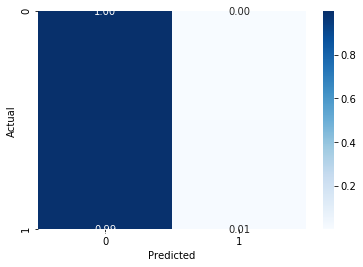

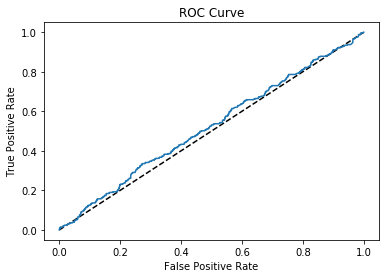

In [58]:
start = datetime.datetime.now()
# Test-Train split
X_Full = user_info_df[['opted_in_to_mailing_list','enabled_for_marketing_drip', 
                           'org_id', 'source_ORG_INVITE',
                           'source_PERSONAL_PROJECTS', 'source_SIGNUP',
                           'source_SIGNUP_GOOGLE_AUTH', 'user_invite']]
y_Full = user_info_df[['is_adopted']]

print("Following is the information on our dataset\n")
print(X_Full.info())

X_train, X_test,y_train, y_test = train_test_split(X_Full, y_Full, test_size=0.2, random_state=42)

# Build Random Forest Classifier
rf = RandomForestClassifier(random_state = 42)
param_grid = {
            'bootstrap': [True],
            'max_depth': [25,30],
            'min_samples_leaf': [6,7],
            'min_samples_split': [2],
            'n_estimators': [1000]
            }
gs = sklearn.model_selection.GridSearchCV(estimator = rf, param_grid = param_grid, n_jobs = -1, verbose = 2, cv=5)
gs_results = gs.fit(X_train,y_train.values.ravel())
best_grid = gs_results.best_estimator_

end = datetime.datetime.now()
print('model building took {} seconds'.format((end-start).seconds))

## Training Score
print('\nTraining data set score is {}\n'.format(accuracy_score(best_grid.predict(X_train),y_train)))

## Hyperparameter and test score
print("Best hyperparameters are\n")
print(best_grid)
print('\nTest data set score is {}\n'.format(accuracy_score(best_grid.predict(X_test),y_test)))

## Classification report
print('Classification Report\n')
print(classification_report(y_test,best_grid.predict(X_test)))

## Confustion matrix
print('Confusion Matrix\n')
#labels = ['run', 'pass']
confmat = confusion_matrix(y_test, best_grid.predict(X_test))
confmat_n = confmat.astype('float')/confmat.sum(axis=1)[:, np.newaxis]
fig, ax = plt.subplots()
sns.heatmap(confmat_n, annot=True, fmt='.2f', cmap='Blues', ax=ax)
ax.set_ylabel('Actual')
ax.set_xlabel('Predicted')
ax.axhspan  
plt.savefig('Conf_mat_RF.png')

## ROC Curve
y_pred_prob = best_grid.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
fig, ax = plt.subplots()
ax.plot([0, 1], [0, 1], 'k--')
ax.plot(fpr, tpr)
ax.set_xlabel('False Positive Rate')
ax.set_ylabel('True Positive Rate')
ax.set_title('ROC Curve');
plt.savefig('ROC_RF.png')

## Feature Importance
print("Features sorted by their score:")
print(sorted(zip(map(lambda x: round(x, 4), best_grid.feature_importances_), X_train.columns), 
             reverse=True))

In [61]:
y_Full.is_adopted.sum()/(len(y_Full))

0.138